# Examples and exercises on
# Statistics, Machine Learning and Data Visualization with Python

****
+ get familiar with packages for dealing with Python
+ work on exercise to be completed and submitted 

### [1) Simple random sampling](#1)
### [2) Stratified random sampling](#2)
### [3) Systematic sampling](#3)
### [4) Boxplot, Quartiles and Outliers](#4)
### [5) Machine Learning: instance-based learning (or memory-based learning)](#5)

****

+ data source: https://en.wikipedia.org/wiki/Iris_flower_data_set
****

<a id='1'></a>
# 1) Simple random sampling

## imports for Python: Pandas and Numpy

In [3]:
import pandas as pd
import numpy as np

## loading dataset (which will be used  at all the exercises)

In [5]:
iris = pd.read_csv('./dados/iris.csv')
iris.shape

(150, 5)

In [6]:
# the dataset has 150 lines and 5 columns
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


The sampling will contain approximately 50% of the data
It means that we will choose ramdomly half of the instances to compose a new dataframe
To do that, first we'll create an array with of 150 lines with ramdon choices of 0 and 1.

In [7]:
sample = np.random.choice(a = [0, 1], size = 150, replace = True, p = [0.5, 0.5])
sample

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [8]:
## It is possible to verify the size of the array for each choice
len(sample)

150

In [9]:
len(sample[sample == 1])

69

In [10]:
len(sample[sample == 0])

81

 The array can be splitted approximately in half. The sampling is done by selecting an instance of the dataset with an instance of the array. We creat a new dataframe and append to it those instances associated with
sample = 1.

In [11]:
#"iloc[1,:]" select the entire instance
#"range(0,150)" in order to Python takes until 149)


iris_final = pd.DataFrame()

for i in range(0,150):
    if sample[i] == 1:
        iris_final = iris_final.append(iris.iloc[i,:])
    else:
        continue

In [33]:
iris_final

,class,petal length,petal width,sepal length,sepal width
0,Iris-setosa,1.4,0.2,5.1,3.5
2,Iris-setosa,1.3,0.2,4.7,3.2
4,Iris-setosa,1.4,0.2,5.0,3.6
6,Iris-setosa,1.4,0.3,4.6,3.4
7,Iris-setosa,1.5,0.2,5.0,3.4
8,Iris-setosa,1.4,0.2,4.4,2.9
14,Iris-setosa,1.2,0.2,5.8,4.0
16,Iris-setosa,1.3,0.4,5.4,3.9
17,Iris-setosa,1.4,0.3,5.1,3.5
18,Iris-setosa,1.7,0.3,5.7,3.8


<a id='2'></a>
# 2) Stratified random sampling

## imports for Python: Pandas and train_test_split (sklearn)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Data spliting and random stratification

We may stratify the data by its fifth column, the 'class' attribute

In [15]:
iris['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

We will make a stratification sampling of 50% of the data.
The stratification means that the sampling must follow the same proportion of original iris classes (1/3 of each class).

In [17]:
# the train_test_split tool is a tool typically applied in Machine Learning when we want to to split the available data
# into 2 groups, one for training and the other for test. The input is the explanatory variables and the response variable
# The output are 4 arrays, two for the train and test explanatory variables and two for the train and test response variables.
# In the present case, we can dismiss the test variables by underlines "_" in the code.

#Usage:
# train_test_split(*arrays, **options). arrays: sequence of indexables with same length / shape[0]

#iloc[:,0:4] = [all lines,  columns from 0 to 3]
# x receives the 1st iloc, y receives de 2sd one.

#test_size: to take 50% of the data 
#stratify: indicates which attribute will be used to stratify

x, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4],
                                test_size = 0.5, stratify = iris.iloc[:,4])

In [18]:
# verifing
y.value_counts()

Iris-virginica     25
Iris-versicolor    25
Iris-setosa        25
Name: class, dtype: int64

<a id='3'></a>
# 3) Systematic sampling


## imports for Python: Pandas, Numpy and Math

In [13]:
#ceil: to rounding values
import numpy as np
import pandas as pd
from math import ceil

The goal is to select 15 instances from 150 of total population By a systematic sampling, we will select individuals in a line by the same interval, starting ramdomly

In [14]:
# We create a variable k which provides the value for the intervals, which in this case is 10.

population = 150
sampling = 15
k = ceil(population / sampling)

In [51]:
# we define the ramdomness with randint, to generate one integer (size=1)
# between 1 and 10 (k+1, otherwise, with just k, Python would understand 1 to 9)
r = np.random.randint(low = 1, high = k + 1, size = 1)

In [53]:
# the variable r has a vector dimension. We create another variable to receive the value, but being a number.
# Also, we creat a list to receive the values raffled.
accumulator = r[0]
raffled = []
for i in range(sampling):
   # print(accumulator)
    raffled.append(accumulator)
    accumulator += k

In [54]:

raffled

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145]

In [56]:
# Now, we associate the list raffled to the dataset iris:
iris_final2 = iris.loc[raffled]
iris_final2

,sepal length,sepal width,petal length,petal width,class
5,5.4,3.9,1.7,0.4,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor


<a id='4'></a>
# 4) Boxplot, Quartiles and Outliers
## Identifying outliers in the Iris dataset

+ A Boxplot is based in the quartiles estimated from all datapoints.
+ The dataset is divided in 4 groups, in numerical sequence, with the same number of elements. Each group is a quartile.
+ The 2nd quartile is the median
+ The inferior and superior limits of the boxplot are defined by the first and last datapoint, respectively
+ The inferior and superior limit of the box is defined by the first and 3rd quartiles: this is the Inter Quartile Range (IQR)
+ The line draw in the IQR is the median, or the 2nd quartile.
+ Outliers are considered those datapoints that are 1.5*IQR above the 3rd and below the 1st quartile.
+ For a Normal Distribution, the IQR contains 50% of the datapoints and 1.5*IQR limits contains 99%.


# Imports for Python: Pandas, Numpy, Matplotlib

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [24]:
# We are examining the data for Sepal Width from the dataset (second column)
# The quartiles of this dataset is defined:

quartis = np.quantile(iris.iloc[:,1], [0, 0.25, 0.5, 0.75])
quartis

array([2. , 2.8, 3. , 3.3])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8f8ca27b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8f8ca2eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8f8ca2390>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8f8ca8588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8f8ca88d0>],
 'means': []}

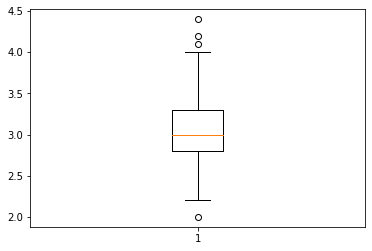

In [28]:
# The outliers are the datapoints above (3.3+1.5*IQR) = 4.05, and below (2.8-1.5*IQR) = 2.05

plt.boxplot(iris.iloc[:,1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8f8d2ae80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8f8d39898>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8f8d2ad30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8f8d39f28>],
 'fliers': [],
 'means': []}

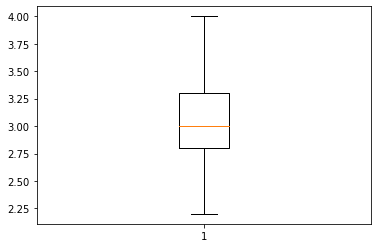

In [26]:
# We can dismiss the appereance of the outliers in the plot

plt.boxplot(iris.iloc[:,1], showfliers = False)

In [32]:
# We also may take those outliers to a specific dataframe

outliers = iris[(iris['sepal width'] > 4.05) | (iris['sepal width'] < 2.05)]
outliers

,sepal length,sepal width,petal length,petal width,class
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


# Python Outlier Detection (PyOD)

## PyOD is featured for:

+    Unified APIs, detailed documentation, and interactive examples across various algorithms.
+    Advanced models, including Neural Networks/Deep Learning and Outlier Ensembles.
+    Optimized performance with JIT and parallelization when possible, using numba and joblib.

references: https://github.com/yzhao062/pyod

# Import for Python: KNN from PyOD

In [ ]:
from pyod.models.knn import KNN

In [97]:
sepal_width = iris.iloc[:,1]
sepal_width = pd.DataFrame({'sepal_width':sepal_width.values})
sepal_width

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
5,3.9
6,3.4
7,3.4
8,2.9
9,3.1


In [82]:
detector = KNN()
detector.fit(sepal_width)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [83]:
previsoes = detector.labels_
previsoes

#previsoes = pd.DataFrame(previsoes)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
sepal_width = iris.iloc[:,1]
for i in range(0,150):
    if previsoes[i] == 1:
        print(sepal_width[i])
    else:
            continue

4.0
4.4
4.1
4.2
2.0


<a id='5'></a>
# 5) Machine Learning: instance-based learning (or memory-based learning)

****
"Instance-based learning is a family of of learning algorithms that, instead of performing explicit generalization, compares new problem instances with instances seen in training, which have been stored in memory. It is called instance-based because it constructs hypotheses directly from the training instances themselves. This means that the hypothesis complexity can grow with the data: in the worst case, a hypothesis is a list of n training items and the computational complexity of classifying a single new instance is O(n). One advantage that instance-based learning has over other methods of machine learning is its ability to adapt its model to previously unseen data. Instance-based learners may simply store a new instance or throw an old instance away"

"Memory-based learning is based on the assumption that in learning a cognitive task from experience people do not extract rules or other abstract representations from their experience, but reuse their memory of that experience directly. Memory-based learning and problem solving incorporates two principles: learning is the simple storage of a representation of experiences in memory, and solving a new problem is achieved by reusing solutions from similar previously solved problems."
****
+ references: Walter Daelemans; Antal van den Bosch (2005). Memory-Based Language Processing. Cambridge University Press;
               https://en.wikipedia.org/wiki/Instance-based_learning

# Imports for Python: train_test_split, confusion_matrix, accuracy_score, KNeighborsClassifier, stats

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

Applying these techniques to Iris dataset means to create an algorithm able to classify new flowers (new instances) based on the width and length of
their sepal and the width and length of their petal. 

In [7]:
# with train_test_split, we'll split the dataset taking 70% to train the algorithm and 30% to test it.

#random_state: - If int, random_state is the seed used by the random number generator; - If RandomState instance, random_state is the random number generator;
#- If None, the random number generator is the RandomState instance used by np.random.

X_training, X_test, y_training, y_test = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4], test_size=0.3, random_state = 0)


In [9]:
# Defining the algorithm classifier. We know there are three types of flowers in the dataset: iris-setosa, iris-virginica and iris-versicolour
# Training the algorithm to classify with the training dataset:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_training, y_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [99]:
# Creating a variable to receive the forecast produced by the trained algorithm using the x_test dataset

forcasting = knn.predict(X_test)
forcasting

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [101]:
# Comparting the forcasting with the actual data from y_test, applying a confusion_matrix
# It is noticeable the high rate of coincidences between the forcasting and y_test, missing just one classification.


confusion = confusion_matrix(y_test, forcasting)
confusion

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [105]:
# Score of the algorithm: ~98% of accuracy
# In large datasets, this method should be improved to prevent overfitting

accuracy = accuracy_score(y_test, forcasting)
accuracy

0.9777777777777777